# PROYECTO FINAL

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica, y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import datetime
import matplotlib.pyplot as mplt
import seaborn as sbn
import numpy as np

PREGUNTAS

¿en que momento del año se alquilan mas bicicletas?

Influye soleado o nubes?

Fin de semana o laborable?

los primeros y ultimos dias del mes hay mas reservas?

festivos aumenta las reservas?

la tempreatura a partir de la cual disminuye los alquileres  ->Punto ruptura

Punto maximo de alquiler

la temperatura alta influye al alquiler de espontaneos o habituales?

la humedad es un punto clave en algun momento? A partir de que punto de humedad bajan drasticamente las reservas?

fecha donde hay mas y menos reservas






In [5]:
df_bike = pd.read_csv("./bikes.csv", index_col=0)
df_bike.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
120,121,01-05-2018,summer,0,5,0,0,0,2,18.518347,22.41020,76.2083,7.125718,1138,2213,3351
218,219,07-08-2018,autumn,0,8,0,0,0,1,30.442500,35.76460,75.2917,13.499629,1298,2487,3785
383,384,19-01-2019,spring,1,1,0,4,1,1,7.790000,9.50190,49.7500,14.750586,130,3162,3292
717,718,19-12-2019,winter,1,12,0,3,1,1,13.632500,17.10810,62.5417,12.334164,333,4934,5267
149,150,30-05-2018,summer,0,5,1,1,0,1,30.066653,33.55460,68.5000,8.792075,1549,2549,4098
196,197,16-07-2018,autumn,0,7,0,6,0,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923


# separando la col DTime en day, month, year

In [6]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [7]:
df_bike["day"] = df_bike["dteday"].str.split(pat= "-", n = -1, expand = True)[0]

In [8]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [9]:
df_bike=df_bike.reindex(columns=['instant', 'dteday', 'season', 'yr', 'mnth','day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

In [10]:
df_bike["day"] =df_bike["day"].astype("int64") #cambiado a int

In [11]:
df_bike.sample()

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
606,607,30-08-2019,autumn,1,8,30,0,4,1,1,28.973347,32.63895,59.0417,5.166819,1172,6541,7713


In [12]:
for index,row in df_bike.iterrows():
    
    if row['mnth'] >=3 and row['mnth'] <=5:
        row['season']= "spring"
    if row['mnth'] >=6 and row['mnth'] <=8:
        row['season']= "summer"
    if row['mnth'] >=9 and row['mnth'] <=11:
        row['season']= "autumn"
    if row['mnth'] ==12 or row['mnth']==1 or row['mnth']==2:
        row['season']= "winter"
    
    

In [13]:
df_bike.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
df_bike.season.unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

In [15]:
df_bike.head(10)

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,2,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,3,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,4,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,5,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,6,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,7,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,8,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,9,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,10,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# CUANTAS RESERVAS POR TEMPORADA DEL AÑO

In [52]:
#¿Cuantas reservas se hacen pos season y por tipo de cliente?
df_bike.groupby(['season']).agg({'cnt': ['sum'],'casual': ['sum'],'registered': ['sum']}).stb.subtotal()



,cnt,casual,registered
,sum,sum,sum
season,,,
autumn,1061129,226091,835038
spring,469514,60557,408957
summer,918589,203522,715067
winter,841613,129782,711831
grand_total,3290845,619952,2670893


<AxesSubplot:xlabel='registered', ylabel='season'>

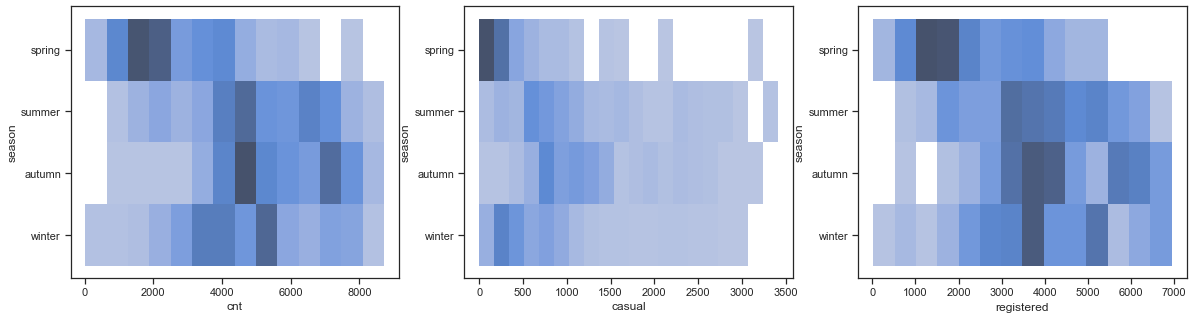

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(data=df_bike, x="cnt",y="season",ax=axes[0])
sns.histplot(data=df_bike, x="casual",y="season",ax=axes[1])
sns.histplot(data=df_bike, x="registered",y="season",ax=axes[2])

#HAY MAS RESERVAS DE GENTE REGISTRADA QUE CASUAL

<AxesSubplot:xlabel='registered', ylabel='season'>

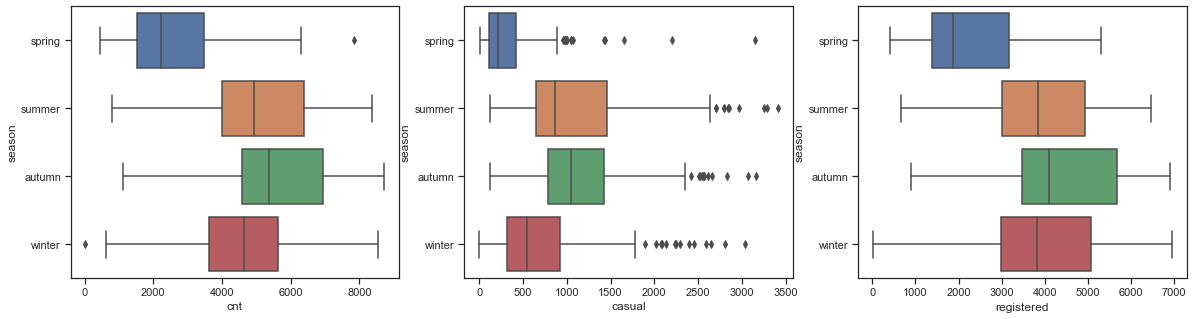

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sbn.boxplot(data=df_bike, x='cnt', y='season',ax=axes[0])
sbn.boxplot(data=df_bike, x='casual', y='season',ax=axes[1])
sbn.boxplot(data=df_bike, x='registered', y='season',ax=axes[2])

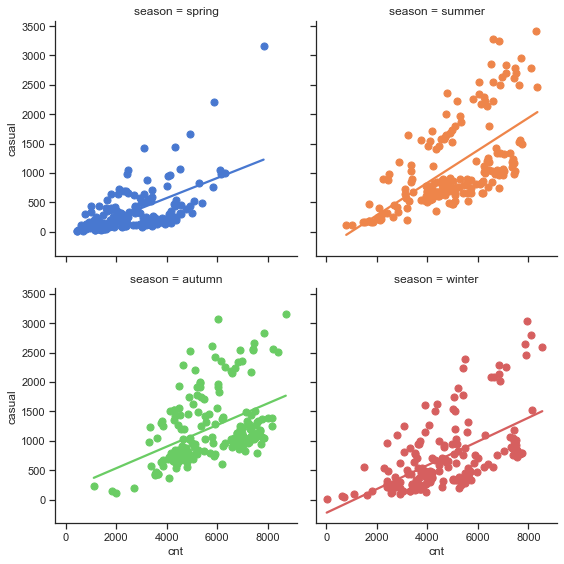

In [28]:
sns.set(style="ticks")
sns.lmplot(x="cnt", y="casual", col="season", hue="season", data=df_bike,
               col_wrap=2, ci=None, palette="muted", height=4,
               scatter_kws={"s": 50, "alpha": 1});

In [29]:
# media de reservas por season y tipo de cliente
df_bike.groupby(['season']).agg({ 'cnt': ['mean'],'casual': ['mean'],'registered': ['mean']}).stb.subtotal().round(2)

,cnt,casual,registered
,mean,mean,mean
season,,,
autumn,5644.30,1202.61,4441.69
spring,2608.41,336.43,2271.98
summer,4992.33,1106.10,3886.23
winter,4728.16,729.11,3999.05
grand_total,17973.21,3374.25,14598.96


----------------------

# RESERVAS DE BICIS EN "HOLIDAY"
# 1 = festivo
# 0 = no festivo

    HAY MAYOR NUMERO DE RESERVAS LOS NO FESTIVOS

    RESERVAS GENERALES: 
        MAX  registrados reservan mas NO festivos DESTACA
        MIN los que menos reservan son CASUALES tanto festivo como no festivo

        SUMA EN NO FESTIVO
            REGISTRADOS 2.614.817 RESERVAS EN NO FESTIVO
            CASUAL 597.593 RESERVAS EN NO FESTIVO

        SUMA EN FESTIVO
            REGISTRADOS 56.076 RESERVAS EN  FESTIVO
            CASUAL 22.359 RESERVAS EN NO FESTIVO


        

In [100]:
df_bike.groupby(["holiday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)

# hay mas número de reservas en dias NO festivos

cnt                             casual                    \
                min      max        sum    mean    min     max       sum   
holiday                                                                    
0              22.0   8714.0  3212410.0  4530.9    2.0  3410.0  597593.0   
1            1000.0   7403.0    78435.0  3735.0  117.0  3065.0   22359.0   
grand_total  1022.0  16117.0  3290845.0  8265.9  119.0  6475.0  619952.0   

                     registered                               
                mean        min      max        sum     mean  
holiday                                                       
0             842.87       20.0   6946.0  2614817.0  3688.04  
1            1064.71      573.0   5172.0    56076.0  2670.29  
grand_total  1907.58      593.0  12118.0  2670893.0  6358.32

<AxesSubplot:xlabel='holiday', ylabel='count'>

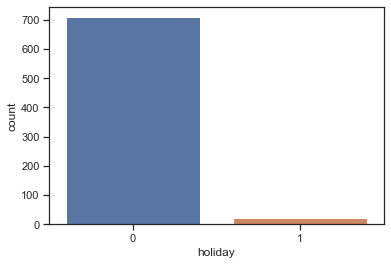

In [99]:
sns.countplot(x='holiday', data=df_bike)

-------

# RESERVA BICIS EN WEEKDAY 
# 1- LUNES 2-MARTES  3-MIERCOLES  4- JUEVES  5-VIERNES 6-SÁBADO  0 -DOMINGO 
#

     Hay bastante igualdad entre los dias de la semana, siendo el ranking de más a menos reservas:
     ORDEN DE DIAS POR RESERVA: Viernes, jueves,sabado, miercoles,martes,lunes y domingo.


In [ ]:
df_bike.groupby(["weekday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)fig, axes = plt.subplots(1, 3, figsize=(20,5))

cnt                               casual                     \
                min      max        sum      mean    min      max       sum   
weekday                                                                       
0             605.0   8227.0   444027.0   4228.83   54.0   3283.0  140521.0   
1              22.0   7525.0   455503.0   4338.12    2.0   3065.0   70784.0   
2             683.0   7767.0   469109.0   4510.66    9.0   1348.0   57843.0   
3             441.0   8173.0   471214.0   4574.89    9.0   2562.0   57254.0   
4             431.0   7804.0   485395.0   4667.26   15.0   1405.0   61460.0   
5            1167.0   8362.0   487790.0   4690.29   38.0   2469.0   78238.0   
6             627.0   8714.0   477807.0   4550.54   57.0   3410.0  153852.0   
grand_total  3976.0  56572.0  3290845.0  31560.60  184.0  17542.0  619952.0   

                     registered                                
                mean        min      max        sum      mean  
weekday                                                        
0            1338.30      451.0   5657.0   303506.0   2890.53  
1             674.13       20.0   6435.0   384719.0   3663.99  
2             556.18      573.0   6697.0   411266.0   3954.48  
3             555.86      432.0   6946.0   413960.0   4019.03  
4             590.96      416.0   6781.0   423935.0   4076.30  
5             752.29     1129.0   6917.0   409552.0   3938.00  
6            1465.26      570.0   5966.0   323955.0   3085.29  
grand_total  5932.98     3591.0  45399.0  2670893.0  25627.62

<AxesSubplot:xlabel='weekday', ylabel='registered'>

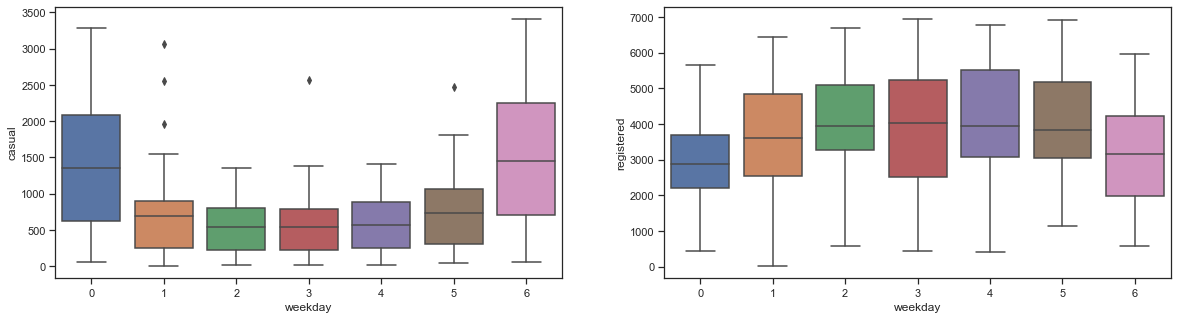

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sbn.boxplot(data=df_bike, x='weekday', y='casual',ax=axes[0])
sbn.boxplot(data=df_bike, x='weekday', y='registered',ax=axes[1])

---

# RESERVAS BICI WORKINGDAY
# 1 - LABORABLE
# 0 -FIN DE SEMANA

In [ ]:
df_bike.groupby(["workingday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)
# 1 dia laborable - hay muchas mas reservas en días laborables que festivos, mas de el doble.

cnt                              casual                    \
               min      max        sum     mean    min     max       sum   
workingday                                                                 
0            605.0   8714.0  1000269.0  4330.17   54.0  3410.0  316732.0   
1             22.0   8362.0  2290576.0  4590.33    2.0  2469.0  303220.0   
grand_total  627.0  17076.0  3290845.0  8920.50   56.0  5879.0  619952.0   

                     registered                               
                mean        min      max        sum     mean  
workingday                                                    
0            1371.13      451.0   5966.0   683537.0  2959.03  
1             607.66       20.0   6946.0  1987356.0  3982.68  
grand_total  1978.79      471.0  12912.0  2670893.0  6941.71

-----

In [119]:
df_bike.head()

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,2,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,3,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,4,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,5,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# poner bien season
# variables respuesta normalizar : casual, registered y cnt
# estandarizar : season  1-2-3-4
# estandarizar temperatura y a temp:  1- frio , 2 - calor, 3- ....
# estandarizar fuerza viento : 1- mucho viento, 2 - poco viento
# estandarizar humedad: 1- poca , 2- mucha,...

PREGUNTAS

TODO EN TORNO AL NUMERO DE RESERVAS: INFLUYE EL TIEMPO, LA TEMPORADAD Y DIAS CLAVE A LA RESERVA DE BICICLETAS?